In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [ ]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
df['is_Epithelial_cells'] = df['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)

counts = df['is_Epithelial_cells'].value_counts()

print(counts)
display(df)

1    12345
0     3150
Name: is_Epithelial_cells, dtype: int64


,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
df_SC162 = df[df['tumourID'] == 'SC162']
df_SC174 = df[df['tumourID'] == 'SC174']
df_SC172 = df[df['tumourID'] == 'SC172']
df_SC177 = df[df['tumourID'] == 'SC177']
df_SC156 = df[df['tumourID'] == 'SC156']

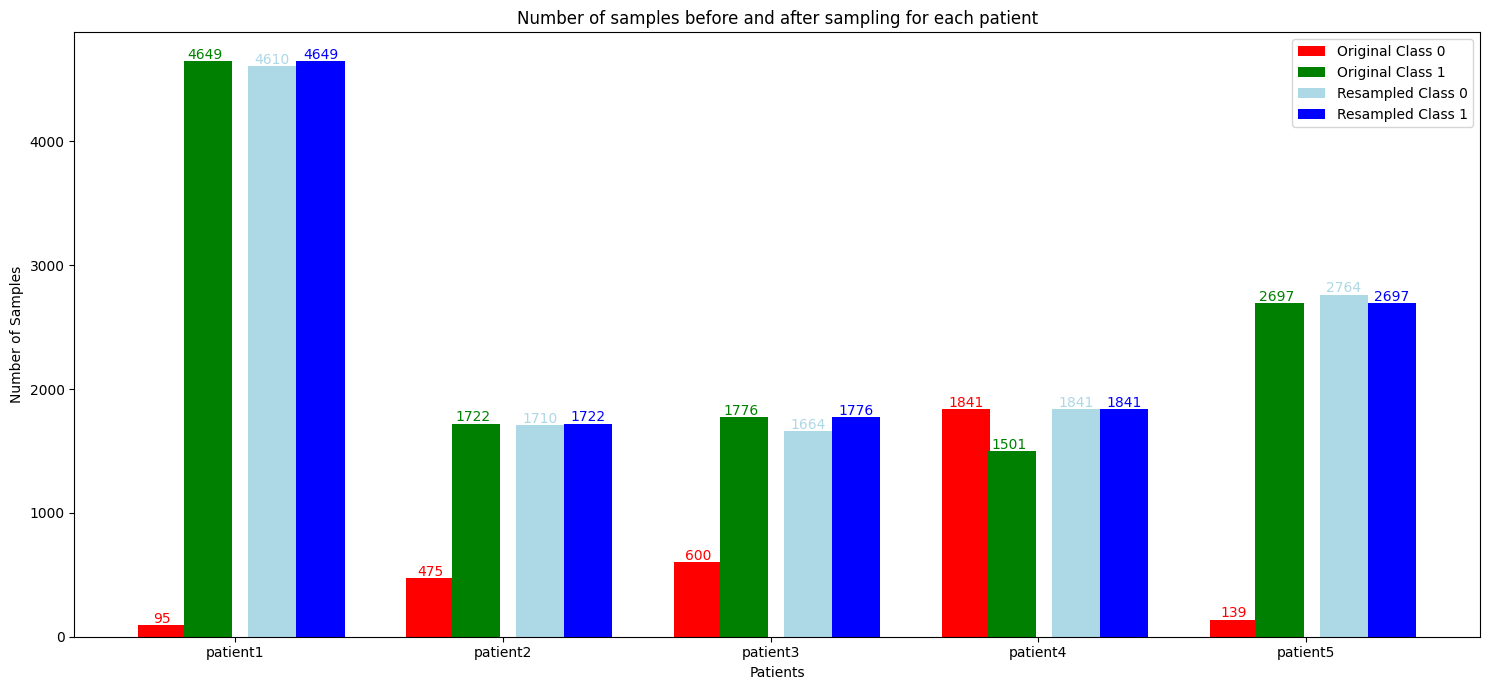

In [ ]:
import matplotlib.pyplot as plt

# Data
patients = ["patient1", "patient2", "patient3", "patient4", "patient5"]
original_counts_0 = [95, 475, 600, 1841, 139]  # original count of class 0
original_counts_1 = [4649, 1722, 1776, 1501, 2697]  # original count of class 1
resampled_counts_0 = [4610, 1710, 1664, 1841, 2764]  # resampled count of class 0
resampled_counts_1 = [4649, 1722, 1776, 1841, 2697]  # resampled count of class 1


fig, ax = plt.subplots(figsize=(15, 7))

bar_width = 0.18
index = range(len(patients))

bar_original_0 = ax.bar(index, original_counts_0, bar_width, label='Original Class 0', color='r')
bar_original_1 = ax.bar([i + bar_width-0.01 for i in index], original_counts_1, bar_width, label='Original Class 1', color='g')
bar_resampled_0 = ax.bar([i + 2*bar_width + 0.05 for i in index], resampled_counts_0, bar_width, label='Resampled Class 0', color='lightblue')
bar_resampled_1 = ax.bar([i + 3*bar_width  + 0.05 for i in index], resampled_counts_1, bar_width, label='Resampled Class 1', color='b')

# Adding numbers above the bars
for i, v in enumerate(original_counts_0):
    ax.text(i, v + 50, str(v), color='r', va='center', ha='center')
for i, v in enumerate(original_counts_1):
    ax.text(i + bar_width-0.02, v + 50, str(v), color='g', va='center', ha='center')
for i, v in enumerate(resampled_counts_0):
    ax.text(i + 2*bar_width+0.05, v + 50, str(v), color='lightblue', va='center', ha='center')
for i, v in enumerate(resampled_counts_1):
    ax.text(i + 3*bar_width+0.05, v + 50, str(v), color='b', va='center', ha='center')

ax.set_xlabel('Patients')
ax.set_ylabel('Number of Samples')
ax.set_title('Number of samples before and after sampling for each patient')
ax.set_xticks([i + 1.5*bar_width for i in index])
ax.set_xticklabels(patients)
ax.legend()

plt.tight_layout()
plt.savefig('five_patient_resampled.png')
plt.show()


#5 different patients

## patient 162

In [ ]:
from imblearn.over_sampling import RandomOverSampler


In [ ]:
X_162 = df_SC162.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_162= df_SC162['is_Epithelial_cells']


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y_162))

# Initialize the ADASYN over sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X_162, y_162)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 1722, 0: 475})
Resampled dataset shape Counter({1: 1722, 0: 1710})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.8573508005822417
              precision    recall  f1-score   support

           0       1.00      0.70      0.83       332
           1       0.78      1.00      0.88       355

    accuracy                           0.86       687
   macro avg       0.89      0.85      0.85       687
weighted avg       0.89      0.86      0.85       687



## patient 172


In [ ]:
X_172 = df_SC172.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_172 = df_SC172['is_Epithelial_cells']


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y_172))

# Initialize the ADASYN over sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X_172, y_172)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 1776, 0: 600})
Resampled dataset shape Counter({1: 1776, 0: 1644})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.8245614035087719
              precision    recall  f1-score   support

           0       0.96      0.65      0.77       318
           1       0.76      0.98      0.86       366

    accuracy                           0.82       684
   macro avg       0.86      0.81      0.82       684
weighted avg       0.86      0.82      0.82       684



## patient 174

In [ ]:
X_174 = df_SC174.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_174 = df_SC174['is_Epithelial_cells']


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y_174))

# Initialize the ADASYN over sampler
adasyn = ADASYN(sampling_strategy=1501/1841, random_state=42)
# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X_174, y_174)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 1841, 1: 1501})


ValueError: ignored

In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_174))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_174, y_174)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 1841, 1: 1501})
Resampled dataset shape Counter({0: 1841, 1: 1841})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


Random Forest Accuracy: 0.6363636363636364
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       379
           1       0.69      0.46      0.55       358

    accuracy                           0.64       737
   macro avg       0.65      0.63      0.62       737
weighted avg       0.65      0.64      0.62       737



## patient 177

In [ ]:
X_177 = df_SC177.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_177 = df_SC177['is_Epithelial_cells']


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y_177))

# Initialize the ADASYN over sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X_177, y_177)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({1: 2697, 0: 139})
Resampled dataset shape Counter({0: 2764, 1: 2697})


In [ ]:
# Print the original class distribution
print('Original dataset shape %s' % Counter(y_177))

# Initialize the random over sampler
ros = RandomOverSampler(random_state=42)

# Fit and resample the data
X_res, y_res = ros.fit_resample(X_177, y_177)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 2697, 0: 139})
Resampled dataset shape Counter({1: 2697, 0: 2697})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)



Random Forest Accuracy: 0.9743824336688015
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       543
           1       0.95      1.00      0.98       550

    accuracy                           0.97      1093
   macro avg       0.98      0.97      0.97      1093
weighted avg       0.98      0.97      0.97      1093



## patient 156


In [ ]:
X_156 = df_SC156.drop(['reference','tumourID','CellType','is_Epithelial_cells'], axis=1)
y_156 = df_SC156['is_Epithelial_cells']


In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter

# Print the original class distribution
print('Original dataset shape %s' % Counter(y_156))

# Initialize the ADASYN over sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X_156, y_156)

# Print the new class distribution
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 4649, 0: 95})
Resampled dataset shape Counter({1: 4649, 0: 4610})


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

Random Forest Accuracy: 0.9919006479481641
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       935
           1       0.98      1.00      0.99       917

    accuracy                           0.99      1852
   macro avg       0.99      0.99      0.99      1852
weighted avg       0.99      0.99      0.99      1852



Text(0.5, 1.0, 'Accuarcy for 5 patients')

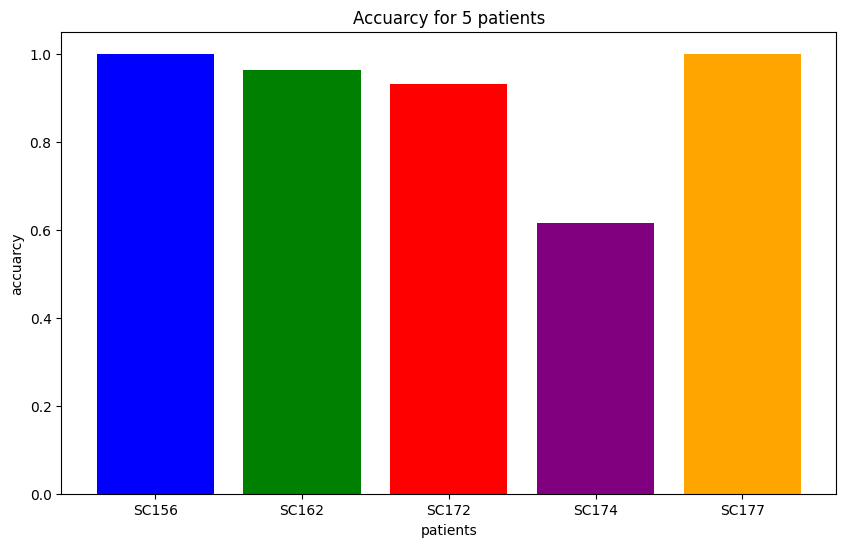

In [ ]:
import matplotlib.pyplot as plt

# example data
categories = ['SC156','SC162', 'SC172', 'SC174', 'SC177']
values = [1,0.9637155297532656,0.9310829817158931,0.6146540027137042,1.0]


# specify colors for each category
colors = ['blue', 'green', 'red', 'purple', 'orange']

# create a bar chart with different colors
plt.figure(figsize=(10,6))
plt.bar(categories, values, color=colors)

plt.xlabel('patients')
plt.ylabel('accuarcy')
plt.title('Accuarcy for 5 patients')


##